In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [3]:
cocacola=pd.read_excel(r"C:\Users\Shiva\Desktop\ExcelR assignments\Forecasting\CocaCola_Sales_Rawdata.xlsx")

In [4]:
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


### Plotting the data

<Axes: >

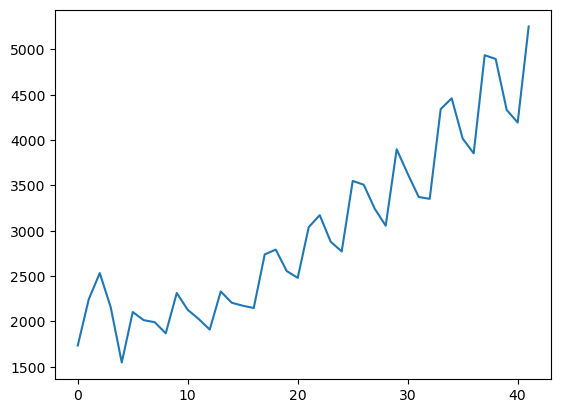

In [5]:
cocacola.Sales.plot()

In [6]:
len(cocacola)

42

### Splitting train and test data

In [7]:
train=cocacola.head(30)
test=cocacola.tail(12)

### Plotting moving averages

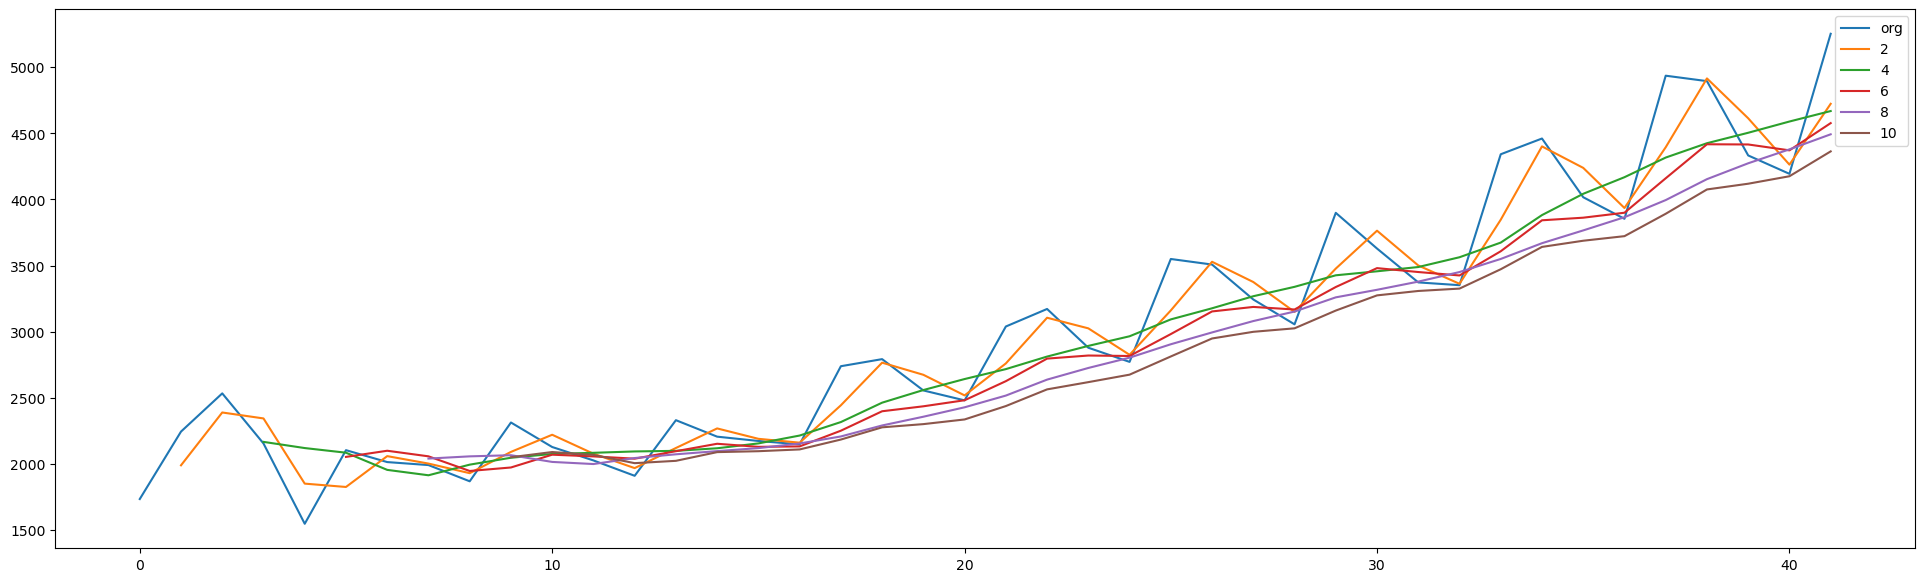

In [8]:
a=range(2,12,2)
plt.figure(figsize=(24,7))
cocacola.Sales.plot(label="org")
for i in a:
    cocacola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Plotting moving averages

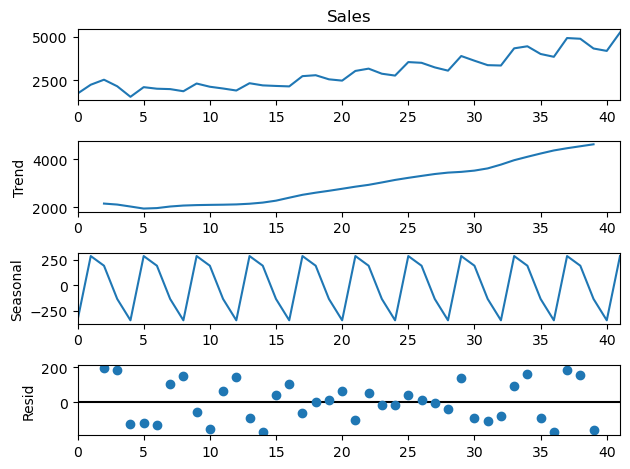

In [9]:
decompose_ts_add = seasonal_decompose(cocacola.Sales,period=4)
decompose_ts_add.plot()
plt.show()

### ACF and PACF plots

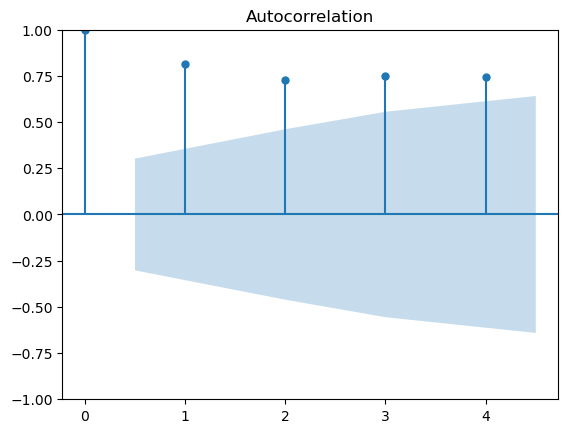

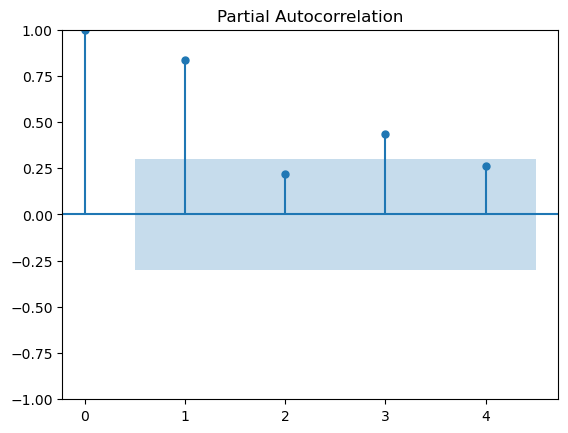

In [10]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cocacola.Sales,lags=4)
tsa_plots.plot_pacf(cocacola.Sales,lags=4)
plt.show()

In [11]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Weighted moving average

In [12]:
weights = np.array([0.1, 0.2, 0.3, 0.4])
df=pd.DataFrame()
df['Sales']=cocacola.Sales
df['WMA'] = df['Sales'].rolling(4).apply(lambda x: np.sum(weights*x))
df

,Sales,WMA
0,1734.827000,NaN
1,2244.960999,NaN
2,2533.804993,NaN
3,2154.962997,2244.601596
4,1547.818996,1996.873596
5,2104.411995,1990.483596
6,2014.362999,1962.128897
7,1991.746998,1976.671997
8,1869.049999,1958.457898
9,2313.631996,2085.953498


### Plotting weighted moving average

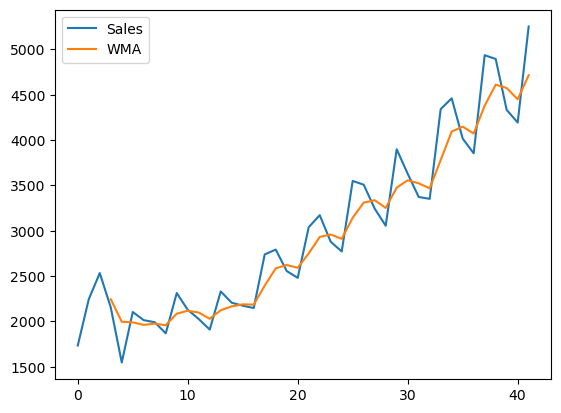

In [13]:
df.Sales.plot(kind='line')
df.WMA.plot(kind='line')
plt.legend()

### Simple exponential smoothing

In [14]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Sales)

22.046763674416013

### Plotting for predictions for test data

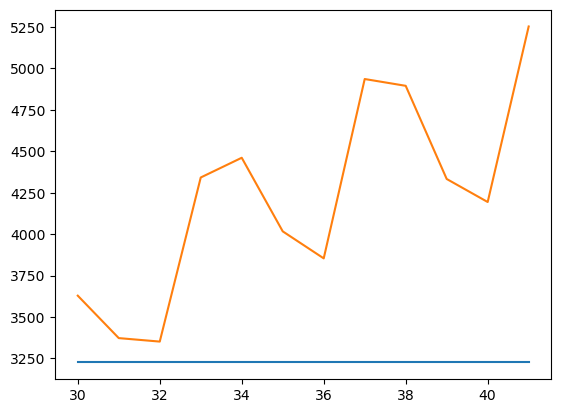

In [15]:
plt.plot(pred_ses)
plt.plot(test.Sales)

### Predictions for the whole data

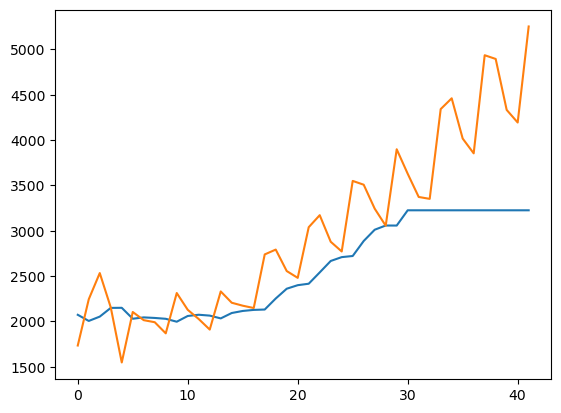

In [16]:
plt.plot(ses_model.predict(start=cocacola.index[0],end=cocacola.index[-1]))
plt.plot(cocacola.Sales)

### Running a for loop to find the best smoothing level value

In [17]:
acc_ses={}
for i in range(101):
    ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=i/100)
    pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
    acc_ses[MAPE(pred_ses,test.Sales)]=i

print('{}:{}'.format(acc_ses[min(acc_ses.keys())],min(acc_ses.keys())))

100:12.53674608511905


### Building a model with 1 as smoothing level

In [18]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=1)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Sales)

12.53674608511905

### Plotting for predictions for test data

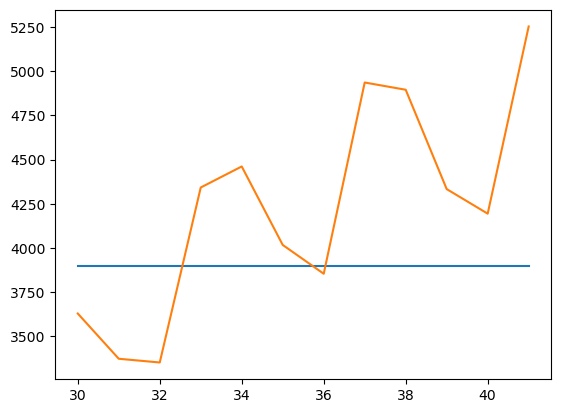

In [19]:
plt.plot(pred_ses)
plt.plot(test.Sales)

### Predictions for the whole data

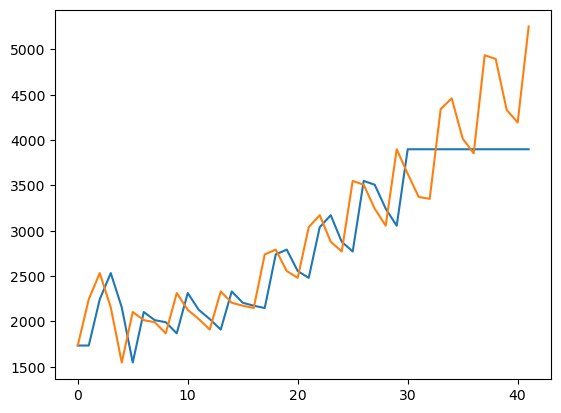

In [20]:
plt.plot(ses_model.predict(start=cocacola.index[0],end=cocacola.index[-1]))
plt.plot(cocacola.Sales)

### Building a model with holt method

In [21]:
holt_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.3)
pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_holt,test.Sales)

14.949345455194036

### Plots

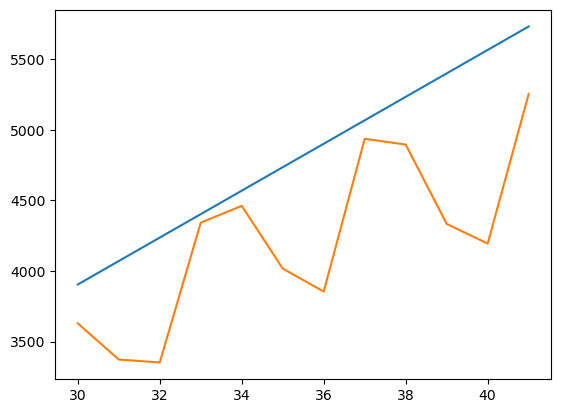

In [22]:
plt.plot(pred_holt)
plt.plot(test.Sales)

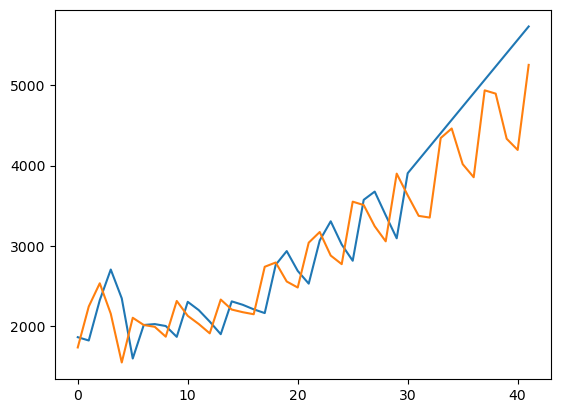

In [23]:
plt.plot(holt_model.predict(start=cocacola.index[0],end=cocacola.index[-1]))
plt.plot(cocacola.Sales)

### running a loop to find the best hyper parameters

In [24]:
accuracy={}
for i in range(0,101):
    for j in range(0,101):
        holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
        pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
        accuracy[MAPE(pred_holt,test.Sales)]=(i,j)

In [25]:
accuracy[min(accuracy.keys())]

(18, 77)

In [26]:
min(accuracy.keys())

8.341820297475

### Building a model with smoothing level=0.18 and smoothing slope=0.77

In [27]:
holt_model = Holt(train["Sales"]).fit(smoothing_level=0.18, smoothing_slope=0.77)
pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_holt,test.Sales)

8.341820297475

### Plots

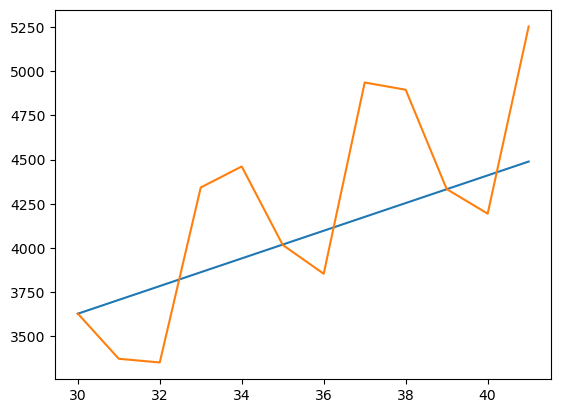

In [28]:
plt.plot(pred_holt)
plt.plot(test.Sales)

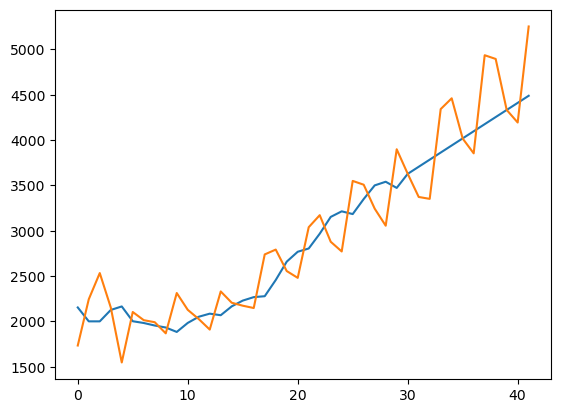

In [29]:
plt.plot(holt_model.predict(start=cocacola.index[0],end=cocacola.index[-1]))
plt.plot(cocacola.Sales)

### Building a model using holt winters method

### from the moving averages plotted earlier,it can be seen that the best seasonal periods value is 4

In [30]:
hw_add_add = ExponentialSmoothing(train["Sales"],seasonal='add', trend='add',seasonal_periods=4).fit()
pred_hw_add = hw_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw_add,test.Sales)

4.754434383376266

### Running a loop to find the best hyperparameters

In [31]:
params=['add','mul']
acc_hw={}
for i in params:
    for j in params:
        hw = ExponentialSmoothing(train["Sales"],seasonal=i, trend=j,seasonal_periods=4).fit()
        pred_hw = hw.predict(start = test.index[0],end = test.index[-1])
        acc_hw[MAPE(pred_hw,test.Sales)]=(i,j)
    

In [32]:
acc_hw[min(acc_hw.keys())]

('mul', 'mul')

In [33]:
min(acc_hw.keys())

2.7676452185083824

### Building a model with both seasonal and trend to be multiplicative

In [34]:
hw = ExponentialSmoothing(train["Sales"],seasonal='mul', trend='mul',seasonal_periods=4).fit()
pred_hw = hw.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Sales)

2.7676452185083824

### Plotting

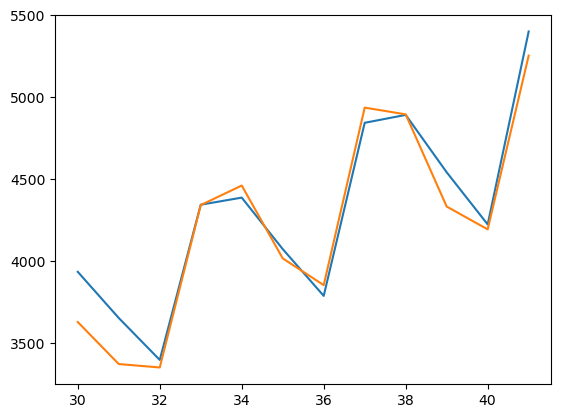

In [35]:
plt.plot(pred_hw)
plt.plot(test.Sales)

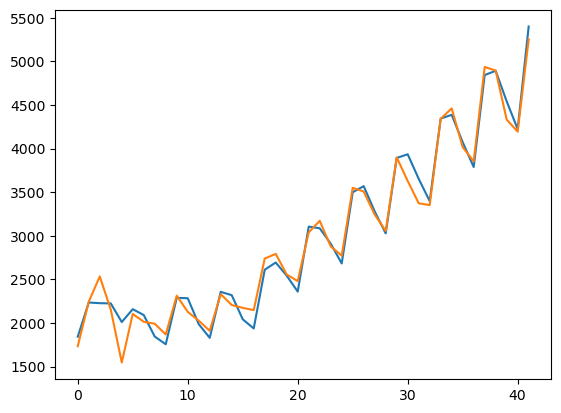

In [36]:
plt.plot(hw.predict(start=cocacola.index[0],end=cocacola.index[-1]))
plt.plot(cocacola.Sales)

### Conclusions

#### Simplle Exponential smoothing

Best smoothing level value was found to be 1. Model built with this value has an rms error value of 12.53.

#### Holt's model

Best smoothing level value was found to be 0.18 and smoothing_slope value to be 0.77. Model built with these parameters have an rms error value of 8.34

#### Holt-Winters method

Putting both seasonal and trend to be multiplicative gives best results. The model built with these parameters give an rms error of 2.75

### So Holt winters model is taken as the final model

In [37]:
model_final=hw